# Import Librairies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing Dataset

In [3]:
Titanic = pd.read_csv('Titanic/train.csv')

In [4]:
Titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
Titanic.describe().round(1) #round(1)???

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.0,891.0,891.0,714.0,891.0,891.0,891.0
mean,446.0,0.4,2.3,29.7,0.5,0.4,32.2
std,257.4,0.5,0.8,14.5,1.1,0.8,49.7
min,1.0,0.0,1.0,0.4,0.0,0.0,0.0
25%,223.5,0.0,2.0,20.1,0.0,0.0,7.9
50%,446.0,0.0,3.0,28.0,0.0,0.0,14.5
75%,668.5,1.0,3.0,38.0,1.0,0.0,31.0
max,891.0,1.0,3.0,80.0,8.0,6.0,512.3


We see that we have some missing values and we must to encoding some columns because they're Object (Sex : Male & Female) so we can't work with object columns

# Data Cleaning & Pre-processing

### Dealing with missing data

In [7]:
Titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

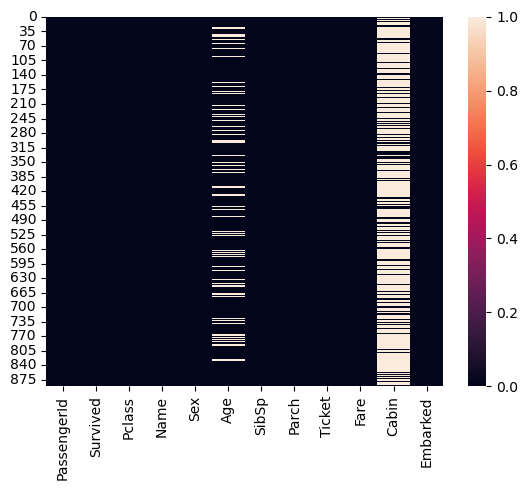

In [8]:
sns.heatmap(Titanic.isna())

In [9]:
Titanic['Age'] = Titanic['Age'].fillna(Titanic['Age'].mean())

In [10]:
Titanic.drop('Cabin',axis = 1, inplace = True) # axis? inplace?

In [11]:
Titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

<Axes: >

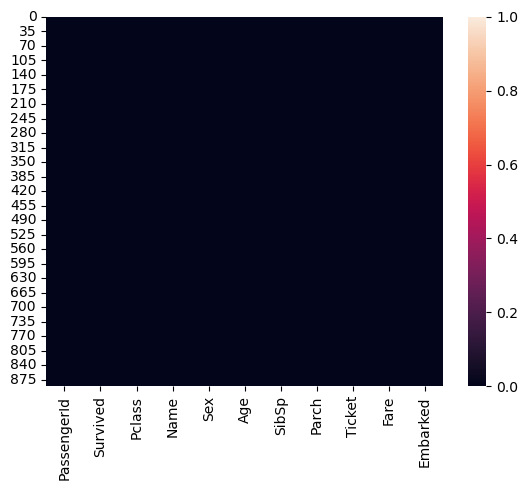

In [12]:
sns.heatmap(Titanic.isna())

### Converting Categorical Features

In [13]:
Titanic['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [14]:
Titanic['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [15]:
Sex = pd.get_dummies(Titanic['Sex'],drop_first=True) #drop_first=True : Pour laisser que une seule colonne(0 ET 1) donc 1 siginifie que Male

In [16]:
Sex

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [17]:
Emb = pd.get_dummies(Titanic['Embarked'])

In [18]:
Emb

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
886,False,False,True
887,False,False,True
888,False,False,True
889,True,False,False


In [19]:
# Titanic['Sex'] = Sex

In [20]:
Titanic = pd.concat([Titanic, Sex, Emb], axis = 1)

In [21]:
Titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,True,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,False,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,False,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,True,True,False,False


In [22]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
 11  male         891 non-null    bool   
 12  C            891 non-null    bool   
 13  Q            891 non-null    bool   
 14  S            891 non-null    bool   
dtypes: bool(4), float64(2), int64(5), object(4)
memory usage: 80.2+ KB


In [23]:
Titanic.drop(['PassengerId','Name', 'Sex', 'Ticket','Embarked'], axis=1 ,inplace=True)

In [24]:
Titanic

,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,0,3,22.000000,1,0,7.2500,True,False,False,True
1,1,1,38.000000,1,0,71.2833,False,True,False,False
2,1,3,26.000000,0,0,7.9250,False,False,False,True
3,1,1,35.000000,1,0,53.1000,False,False,False,True
4,0,3,35.000000,0,0,8.0500,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,True,False,False,True
887,1,1,19.000000,0,0,30.0000,False,False,False,True
888,0,3,29.699118,1,2,23.4500,False,False,False,True
889,1,1,26.000000,0,0,30.0000,True,True,False,False


In [29]:
Titanic.rename(columns = {'male':'Male?'}, inplace=True)
Titanic

,Survived,Pclass,Age,SibSp,Parch,Fare,Male?,C,Q,S
0,0,3,22.000000,1,0,7.2500,True,False,False,True
1,1,1,38.000000,1,0,71.2833,False,True,False,False
2,1,3,26.000000,0,0,7.9250,False,False,False,True
3,1,1,35.000000,1,0,53.1000,False,False,False,True
4,0,3,35.000000,0,0,8.0500,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,True,False,False,True
887,1,1,19.000000,0,0,30.0000,False,False,False,True
888,0,3,29.699118,1,2,23.4500,False,False,False,True
889,1,1,26.000000,0,0,30.0000,True,True,False,False


# Exploratory Data Analysis

<Axes: xlabel='Survived', ylabel='count'>

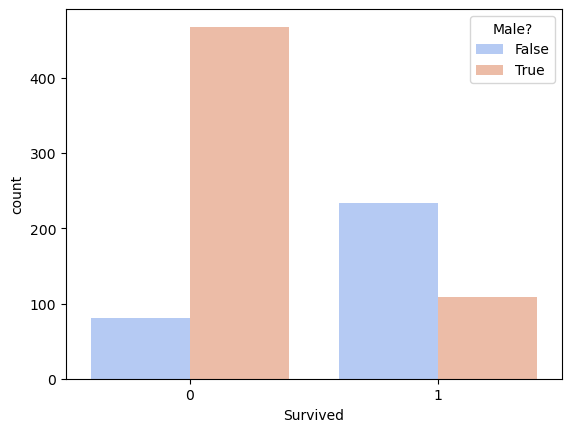

In [32]:
sns.countplot(x='Survived', data=Titanic, hue='Male?', palette='coolwarm')

<Axes: >

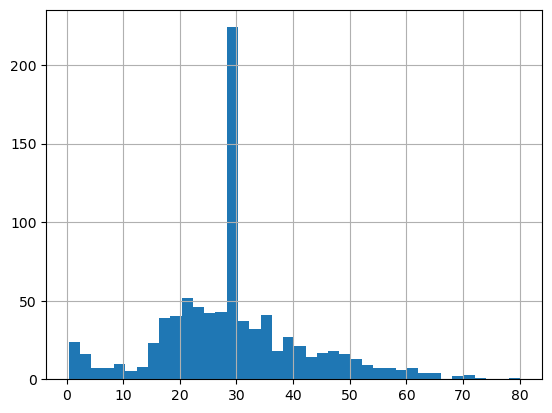

In [34]:
Titanic['Age'].hist(bins=40) # Age 30 is the dominate because we replaced missing values with the mean, and this one in this case is 30

<Axes: >

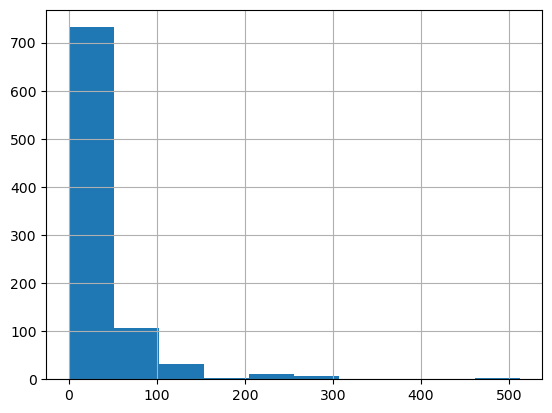

In [35]:
Titanic['Fare'].hist()

# Building Model

### Train/Test Split Data

In [36]:
X = Titanic.drop('Survived', axis = 1)
y = Titanic['Survived']

In [37]:
X

,Pclass,Age,SibSp,Parch,Fare,Male?,C,Q,S
0,3,22.000000,1,0,7.2500,True,False,False,True
1,1,38.000000,1,0,71.2833,False,True,False,False
2,3,26.000000,0,0,7.9250,False,False,False,True
3,1,35.000000,1,0,53.1000,False,False,False,True
4,3,35.000000,0,0,8.0500,True,False,False,True
...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,True,False,False,True
887,1,19.000000,0,0,30.0000,False,False,False,True
888,3,29.699118,1,2,23.4500,False,False,False,True
889,1,26.000000,0,0,30.0000,True,True,False,False


In [38]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [51]:
Titanic.shape

(891, 10)

In [46]:
X_train.shape

(712, 9)

In [47]:
y_train.shape

(712,)

In [49]:
X_test.shape

(179, 9)

In [50]:
y_test.shape

(179,)

### Model Training and Predicting

In [52]:
from sklearn.linear_model import LogisticRegression

In [54]:
Model = LogisticRegression(max_iter=5000)

In [55]:
Model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [58]:
y_pred = Model.predict(X_test)

In [59]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [67]:
y_test
#type(y_test)

pandas.core.series.Series

In [70]:
y_test.values
#type(y_test)

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1], dtype=int64)

### Model Evaluation

In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
confusion_matrix(y_test, y_pred) #True Positive, True Negative, False Positive and False Negative

array([[90, 15],
       [19, 55]], dtype=int64)

In [74]:
from sklearn.metrics import classification_report

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



# Thank You